In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
def summation(sample_input, weights, bias):
    return np.dot(sample_input, weights) + bias

In [27]:
def stepFunction(x):
    return 1 if x > 0 else 0

In [28]:
def bipolarStepFunction(x):
    return 1 if x >= 0 else -1

In [73]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [30]:
def tanh(x):
    return math.tanh(x)

In [31]:
def ReLu(x):
    return max(0, x)

In [32]:
def LeakyReLu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

In [33]:
def mean_squared_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Length of y_true and y_pred must be the same.")
    
    error = sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred))
    return error / len(y_true)

In [21]:
def act(val,n):
    if n == 0:
        return stepFunction(val)
    elif n == 1:
        return bipolarStepFunction(val)
    elif n == 2:
        return sigmoid(val)
    elif n == 3:
        return tanh(val)
    elif n == 4:
        return ReLu(val)
    elif n == 5:
        return LeakyReLu(val)
    else:
        return None

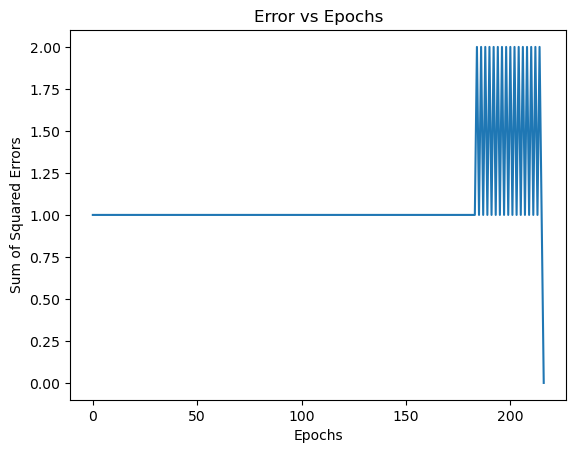

In [40]:
b = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

# Perceptron learning function
def perceptron(inputs, outputs, weights, bias, alpha, n):
    errors = []
    for epoch in range(1000):
        error = 0
        for i in range(len(inputs)):
            sample_input = inputs[i]
            expected_output = outputs[i]
            
            # Summation and activation
            summation_val = summation(sample_input, weights, bias)
            prediction = act(summation_val, n)
            
            # Update weights and bias
            error += (expected_output - prediction) ** 2  # Sum-squared error
            
            # Update rule
            for j in range(len(weights)):
                weights[j] += alpha * (expected_output - prediction) * sample_input[j]
            bias += alpha * (expected_output - prediction)
        
        # Store error for each epoch
        errors.append(error)
        
        # Stop if error converges
        if error <= 0.002:
            break
    
    # Plot errors over epochs
    plt.plot(range(len(errors)), errors)
    plt.title('Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()
    
    return weights, bias, errors

# Define inputs and expected outputs (for AND function in this case)

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 1, 1, 1]
weights = [W1, W2]
bias = b
alpha = 0.05
n = 0
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)


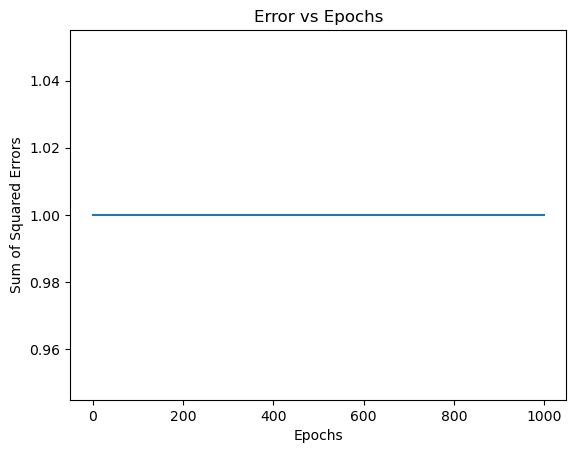

[0.2, 0.0500000000000001]
-7.646661082105766e-15


In [44]:
#using Bipolar Step Function
n = 1
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

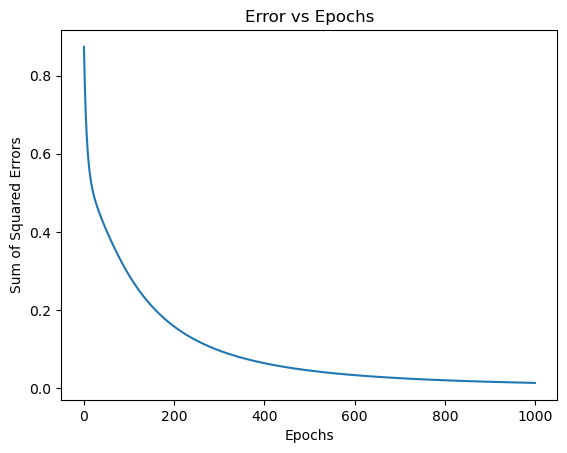

[5.377451740752575, 5.378037095564907]
-2.1902635348389836


In [45]:
#using Sigmoid Function
n = 2
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

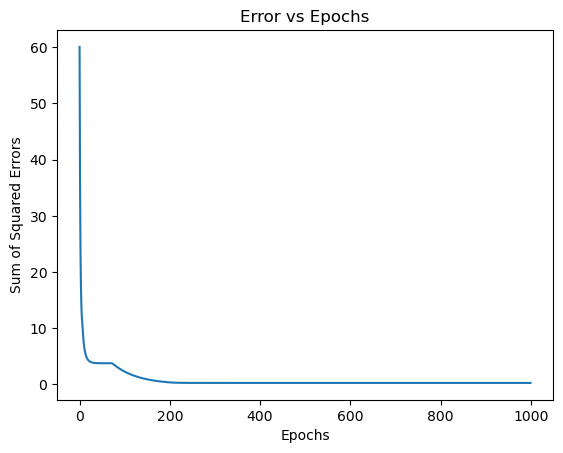

[0.4736842105271354, 0.4868421052639992]
0.2631578947357933


In [46]:
#using ReLu Function
n = 4
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

Question 4

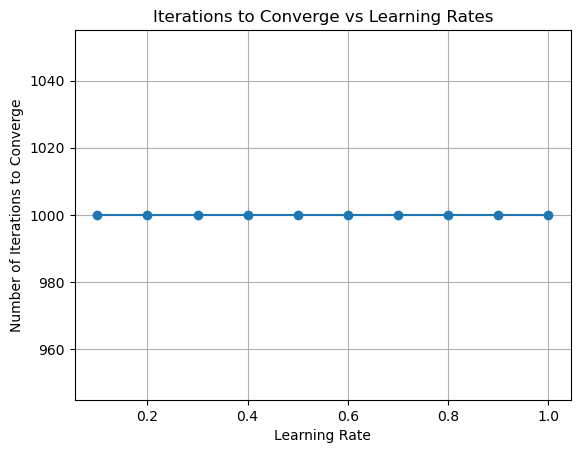

In [47]:
# Define the learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Store the number of iterations for each learning rate
iterations_to_converge = []

# Initial weights and bias
initial_weights = [W1, W2]
initial_bias = b

# Function to run perceptron with varying learning rates
def perceptron_with_varying_lr(inputs, outputs, initial_weights, initial_bias, learning_rates, n):
    for lr in learning_rates:
        weights = initial_weights.copy()
        bias = initial_bias
        errors = []
        for epoch in range(1000):
            error = 0
            for i in range(len(inputs)):
                sample_input = inputs[i]
                expected_output = outputs[i]

                # Summation and activation
                summation_val = summation(sample_input, weights, bias)
                prediction = act(summation_val, n)

                # Update weights and bias
                error += (expected_output - prediction) ** 2  # Sum-squared error

                # Update rule
                for j in range(len(weights)):
                    weights[j] += lr * (expected_output - prediction) * sample_input[j]
                bias += lr * (expected_output - prediction)

            # Store error for each epoch
            errors.append(error)

            # Stop if error converges
            if error <= 0.002:
                iterations_to_converge.append(epoch + 1)
                break
        else:
            iterations_to_converge.append(1000)  # If not converged within 1000 epochs

# Run the perceptron with varying learning rates
perceptron_with_varying_lr(inputs, outputs, initial_weights, initial_bias, learning_rates, n)

# Plot the results
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title('Iterations to Converge vs Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.grid(True)
plt.show()

Question 5

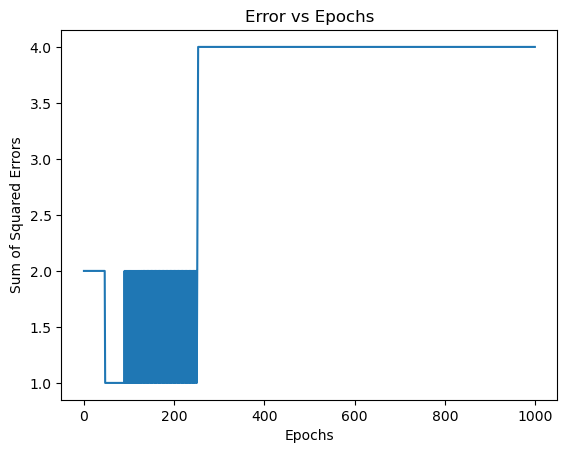

In [48]:
# Define inputs and expected outputs (for XOR function in this case)

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 1, 1, 0]
weights = [W1, W2]
bias = b
alpha = 0.05
n = 0
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)

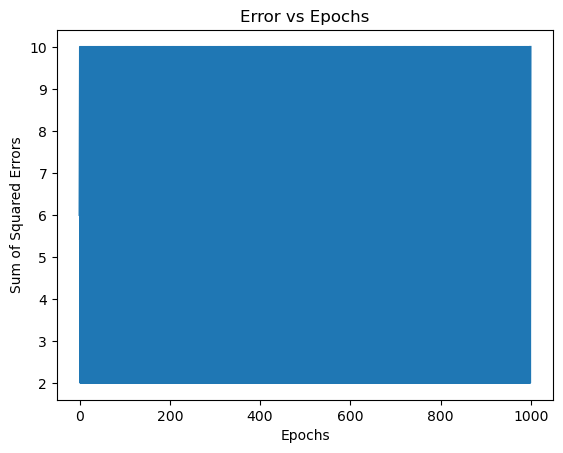

[-0.09999999999999969, 3.191891195797325e-16]
0.19999999999999235


In [49]:
#using Bipolar Step Function
n = 1
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

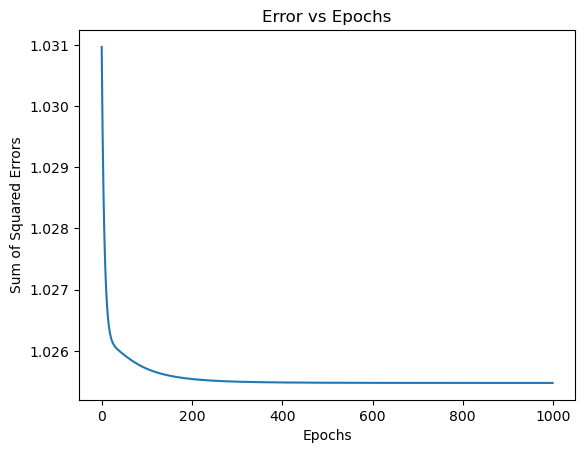

[-0.05065718289791769, -0.02534065933752252]
0.02534566308871004


In [50]:
#using Sigmoid Function
n = 2
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

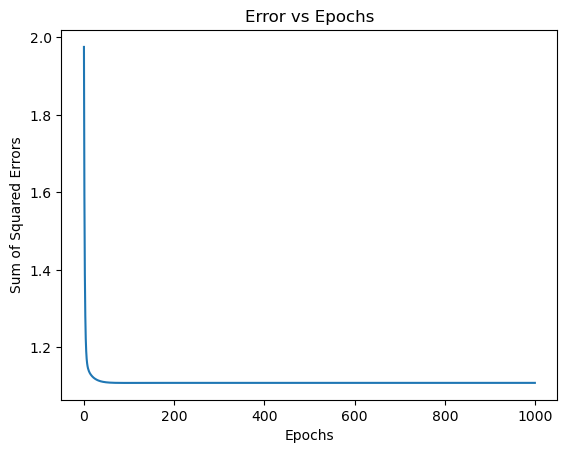

[-0.05263157894736717, -0.026315789473682946]
0.5263157894736823


In [51]:
#using Relu Function
n = 4
weights, bias, errors = perceptron(inputs, outputs, weights, bias, alpha, n)
#last weight and bias
print(weights)
print(bias)

In [77]:
# Prepare the customer data
def prepare_data():
    # Features: Candies, Mangoes, Milk Packets, Payment
    X = np.array([[20, 6, 2, 386],
                  [16, 3, 6, 289],
                  [27, 6, 2, 393],
                  [19, 1, 2, 110],
                  [24, 4, 2, 280],
                  [22, 1, 5, 167],
                  [15, 4, 2, 271],
                  [18, 4, 2, 274],
                  [21, 1, 4, 148],
                  [16, 2, 4, 198]])

    # Labels: 1 for "Yes" (High value), 0 for "No"
    y = np.array([[1],
                  [0],
                  [1],
                  [0],
                  [1],
                  [0],
                  [1],
                  [1],
                  [0],
                  [0]])

    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

In [76]:
# Derivative of sigmoid (used for weight update)
def sigmoid_derivative(x):
    return x * (1 - x)

# Function to train the perceptron and track sum squared error
def train_perceptron(X, y, learning_rate=0.01, epochs=10000):
    # Initialize weights with smaller random values
    np.random.seed(1)
    weights = np.random.rand(X.shape[1], 1) * 0.01  # Smaller weights
    bias = np.random.rand(1) * 0.01  # Smaller bias

    sse_list = []  # To store sum squared errors at each epoch

    for epoch in range(epochs):
        # Forward propagation (simple perceptron)
        linear_output = np.dot(X, weights) + bias
        predicted_output = sigmoid(linear_output)

        # Calculate error (difference between expected and predicted output)
        error = y - predicted_output

        # Sum of squared error (SSE)
        sse = np.sum(np.square(error))
        sse_list.append(sse)

        # Update weights and bias using the error
        adjustments = error * sigmoid_derivative(predicted_output)
        weights += np.dot(X.T, adjustments) * learning_rate
        bias += np.sum(adjustments) * learning_rate

        # Print the SSE at every 1000 epochs to track learning progress
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}: SSE = {sse}')
    
    return weights, bias, sse_list

# Function to predict with trained perceptron
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    predicted_output = sigmoid(linear_output)
    return np.where(predicted_output >= 0.5, 1, 0)  # Thresholding at 0.5

Epoch 0: SSE = 2.4915701842315103
Epoch 1000: SSE = 0.5365465706623476
Epoch 2000: SSE = 0.29636319546480966
Epoch 3000: SSE = 0.20402415091315457
Epoch 4000: SSE = 0.15479774601646754
Epoch 5000: SSE = 0.1242161415292148
Epoch 6000: SSE = 0.10341706909503837
Epoch 7000: SSE = 0.08838752671502428
Epoch 8000: SSE = 0.07704172828852368
Epoch 9000: SSE = 0.06818791058092483
Predictions:
 [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


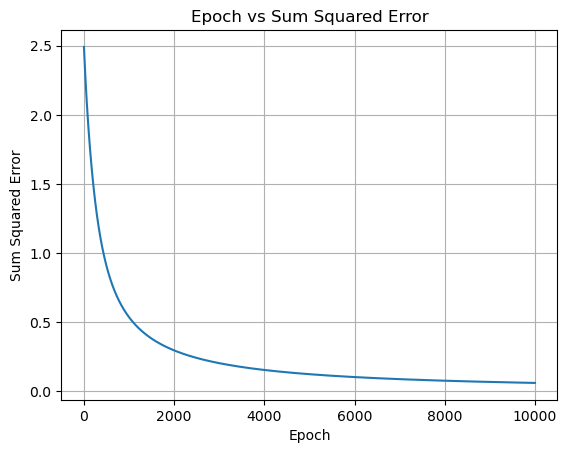

In [78]:
    # Prepare the data
X, y = prepare_data()

    # Train the perceptron and get sum squared error (SSE) list
learning_rate = 0.01  # Continue with a smaller learning rate
epochs = 10000
weights, bias, sse_list = train_perceptron(X, y, learning_rate, epochs)

    # Predict on the training data
predictions = predict(X, weights, bias)
print("Predictions:\n", predictions)

    # Plot the graph of epoch vs sum squared error (SSE)
plt.plot(range(epochs), sse_list)
plt.title('Epoch vs Sum Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Sum Squared Error')
plt.grid(True)
plt.show()

Predictions from Perceptron Learning:
 [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]

Weights from Pseudo-Inverse Method:
 [[ 0.27874317]
 [-0.0390925 ]
 [ 0.54675586]
 [-0.6629798 ]
 [ 0.35702909]]
Predictions from Pseudo-Inverse Method:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]

--- Comparison ---
Perceptron Predictions:  [1 0 1 0 1 0 1 1 0 0]
Pseudo-Inverse Predictions:  [1 1 1 1 1 0 1 1 0 1]
Perceptron Learning Error: 0
Pseudo-Inverse Error: 3


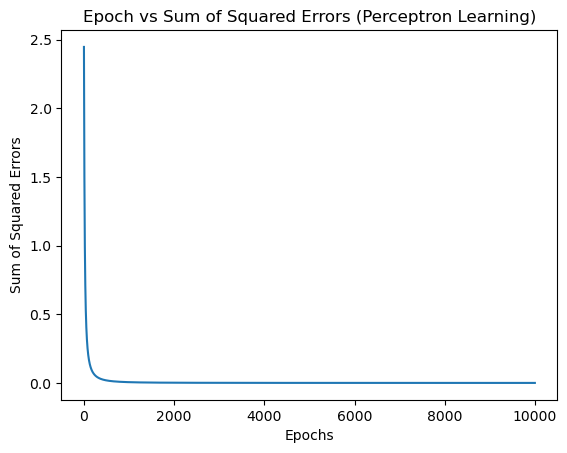

In [79]:
def train_perceptron(X, y, learning_rate, epochs):
    # Initialize weights randomly and bias to 0
    weights = np.random.rand(X.shape[1], 1)
    bias = 0
    
    errors = []  # To store sum of squared errors at each epoch
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            # Linear combination
            linear_output = np.dot(X[i], weights) + bias
            # Apply sigmoid activation
            prediction = sigmoid(linear_output)
            # Calculate error
            error = y[i] - prediction
            # Update weights and bias using gradient descent
            weights += learning_rate * error * X[i].reshape(-1, 1)
            bias += learning_rate * error
            # Sum of squared errors
            total_error += error ** 2
            
        errors.append(total_error)
    
    return weights, bias, errors

# Function to make predictions using perceptron weights
def predict_perceptron(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    predicted_output = sigmoid(linear_output)
    return np.where(predicted_output >= 0.5, 1, 0)

# Pseudo-inverse method to calculate weights
def pseudo_inverse_method(X, y):
    # Adding bias term to input features
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Calculate pseudo-inverse of X
    pseudo_inverse = np.linalg.pinv(X_with_bias)
    
    # Compute weights using the pseudo-inverse formula
    weights_pseudo = np.dot(pseudo_inverse, y)
    
    return weights_pseudo

# Function to make predictions using weights obtained from pseudo-inverse
def predict_pseudo(X, weights):
    # Adding bias term to input features
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Linear combination of inputs and weights
    linear_output = np.dot(X_with_bias, weights)
    
    # Apply sigmoid to get output in the range [0, 1]
    predicted_output = sigmoid(linear_output)
    
    # Convert predictions to binary values (0 or 1)
    return np.where(predicted_output >= 0.5, 1, 0)

# Main function to compare perceptron learning and pseudo-inverse methods
def compare_methods():
    # Prepare the data
    X, y = prepare_data()

    # 1. Perceptron learning method
    learning_rate = 0.05
    epochs = 10000
    weights_perceptron, bias_perceptron, errors = train_perceptron(X, y, learning_rate, epochs)
    
    # Predict with perceptron weights
    predictions_perceptron = predict_perceptron(X, weights_perceptron, bias_perceptron)
    print("Predictions from Perceptron Learning:\n", predictions_perceptron)
    
    # 2. Pseudo-inverse method
    weights_pseudo = pseudo_inverse_method(X, y)
    print("\nWeights from Pseudo-Inverse Method:\n", weights_pseudo)
    
    # Predict with pseudo-inverse weights
    predictions_pseudo = predict_pseudo(X, weights_pseudo)
    print("Predictions from Pseudo-Inverse Method:\n", predictions_pseudo)

    # Compare predictions
    print("\n--- Comparison ---")
    print("Perceptron Predictions: ", predictions_perceptron.ravel())
    print("Pseudo-Inverse Predictions: ", predictions_pseudo.ravel())
    
    # Calculate errors for both methods
    error_perceptron = np.sum(np.abs(predictions_perceptron - y))
    error_pseudo = np.sum(np.abs(predictions_pseudo - y))
    print(f"Perceptron Learning Error: {error_perceptron}")
    print(f"Pseudo-Inverse Error: {error_pseudo}")
    
    # Plot the sum of squared errors vs epochs for the perceptron learning
    plt.plot(range(epochs), errors, label="Sum of Squared Errors")
    plt.xlabel("Epochs")
    plt.ylabel("Sum of Squared Errors")
    plt.title("Epoch vs Sum of Squared Errors (Perceptron Learning)")
    plt.show()

# Run the comparison
compare_methods()